# Select the architecture of convolution Neural Network 

The first part is to build the CNN model in order to extract the main features of the images to enable the model of predicting 
the required captions. The CNN model is constructed from three layers as seen in the below Figure, but in order to ensure that the model will extract the features only, the last two layers were dropped, it is important to note that this step is basically depends on the selected pre-trained model.  

<div>
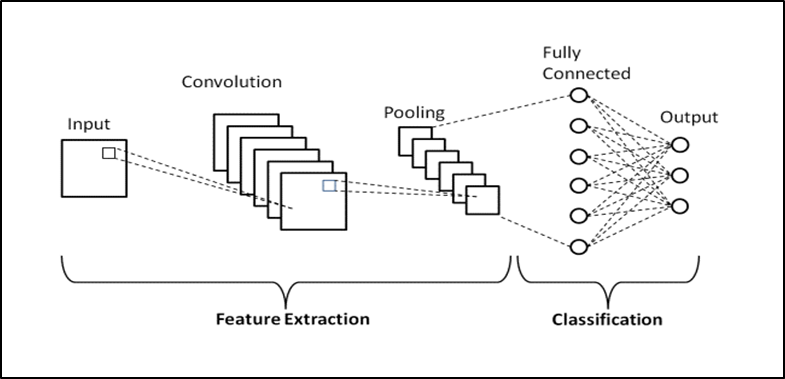
</div>

### Import the required libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from os import listdir
from  keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.models import Model
import tensorflow as tf
from PIL import Image

### Import the MobileNetV2 model:

In [ ]:
def extract_features(directory):
    #The directory where the images are stored.
    # Load the MobileNetV2 model:
    model = MobileNetV2()

    # Remove the second-to-last layer where the claassification occur:
    model.layers.pop()

    # Create a new model using the modified MobileNetV2 model
    #The Model will take the input of the input and the output of the MobileNetV2():
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

    # Print the model summary
    model.summary()
    #The above lines will buils/call the pre-trained model. 
    
    # Create the dictionary variable to save the extracted features based on the ID of the image:
    #Each image     
    features = dict()
    # In the images, each image has its own ID which means that the for loop will loop over a list of images name and save their features:
    for name in listdir(directory):
        #The name in this case is the image ID and the directory is the directory where the image is saved:
        filename = directory + '/' + name
        #The load image step aims to load the images from the specified file and then resize it based on the model requirement.
        #The target size is basically depends on the selected model, in case of MobileNet-V2 the target size is 224*224
        image = load_img(filename, target_size=(224,224))
        #The images then is converted to array instead of tensor:
        image = img_to_array(image)
        #It is important to pass the images size based on the requirements of the model.
        
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        #function is used to normalize the input image data before it is passed through a deep learning model.
        #subtracts the mean image pixel value from each pixel and divides the result by the standard deviation of the image pixel values.
        image = preprocess_input(image)
        #The images then is provided the predict in order to predict the features. 
        feature = model.predict(image, verbose=1)
        #The image id of the extracted features is constructed from the number and the extension, the split will take the image number only.
        image_id = name.split('.')[0]
        features[image_id] = feature
        print('image name is: ' + name)
    return features

### Save the extracted features in dynamic directory

To avoid time wasting, the features were saved on dynamic file to call it when it is required, this step is important to ensure that the features won't be extracted with each single run, espeacially that feature extraction take around 30 minutes at least.

In [ ]:
#Save the extracted features in the required directory:
# Specify the directory where the features will be saved in:
directory = 'C:\\Users\\hp\\Desktop\\Personal files\\HTU\\python\\project\\workingfile'

# Use os.path.join to combine the directory and the filename
filename = os.path.join(directory, 'features_MobileNet.pkl')

#Specify the name of the data file in which you aim to exract features from:
data= 'C:\\Users\\hp\\Desktop\\Personal files\\HTU\\python\\project\\Dataset\\Flicker8k_Dataset'      
features=extract_features(data) 

# Save the features to the specified file instead of running the file each single time
pickle.dump(features, open('MobileNet_V2', 'wb'))   

The features were extracted as array of numbers, then were used later on through model training step. 

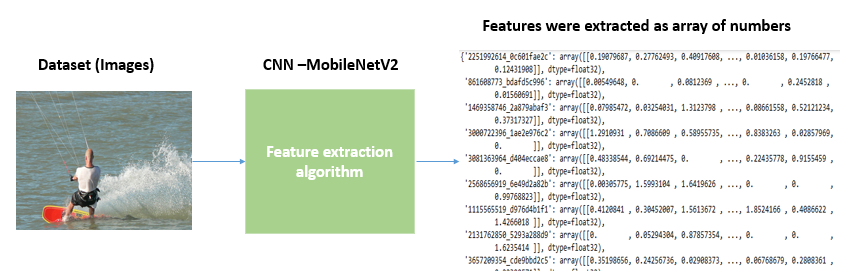